In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from scipy import interpolate
from scipy.stats import linregress
from voigt_fit_lib import *

In [2]:
plt.style.use('/Users/thepoetoftwilight/Documents/Astro/Code/PG1522+101/science.mplstyle')

In [3]:
rootdir = '/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/'

Load in HIRES spectra

In [4]:
spec = fits.open(rootdir+'HIRES/PG1522+101_HIRES.fits')

wav = spec[1].data['wave']
flux = spec[1].data['flux']
err = spec[1].data['error']

In [8]:
delta_wav = np.mean(wav[1:]-wav[:-1])
wav_0 = .5*(wav[0] + wav[-1])

delta_wav_res = (6.7/3e5)*wav_0
N_res = int(delta_wav_res//delta_wav)

In [9]:
N_res

5

In [10]:
wav_smooth = np.convolve(wav, np.ones(N_res), mode='valid')/N_res

z_smooth = wav_smooth/1548-1
flux_smooth = np.convolve(flux, np.ones(N_res), mode='valid')/N_res
err_smooth = np.convolve(err, np.ones(N_res), mode='valid')/N_res
sig_smooth = err_smooth/flux_smooth

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_14786/2892216717.py:5: RuntimeWarning: divide by zero encountered in divide
  sig_smooth = err_smooth/flux_smooth


In [15]:
z_smooth

array([0.93509577, 0.93510416, 0.93511255, ..., 2.79759681, 2.79761328,
       2.79762974])

In [13]:
lim_EW_smooth = 3*sig_smooth*np.sqrt(N_res)*delta_wav_res/(1+z_smooth)

In [16]:
def eval_comp(Wr, z1=1.0, z2=1.3):
    
    idx = (z_smooth>z1)&(z_smooth<z2)
        
    g = np.float_(Wr>lim_EW_smooth[idx])
    g0 = np.ones(len(lim_EW_smooth[idx]))
    
    z = z_smooth[idx]
    
    dX_dz = (1+z)**2/np.sqrt(0.3*(1+z)**3 + 0.7)
    
    DX = np.trapz(g*dX_dz, z)
    DX0 = np.trapz(g0*dX_dz, z)
    
    return DX/DX0

In [21]:
W_range = np.arange(0.001, 0.1, 0.003)
C_W = [eval_comp(W) for W in W_range]

In [34]:
eval_comp(.02)

0.4859185451495959

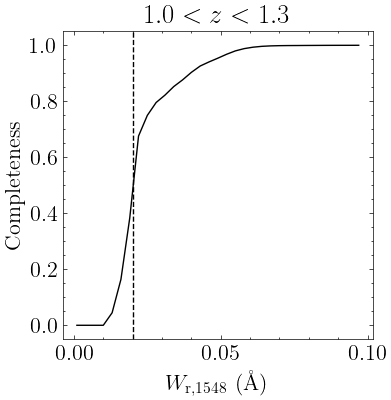

In [37]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.plot(W_range, C_W)

ax.set_xlabel(r'$W_\mathrm{r, 1548}$ (Å)')
ax.set_ylabel(r'Completeness')

ax.set_title(r'$1.0 < z < 1.3$')

ax.axvline(0.02, linestyle='--')

Load in STIS spectra

In [10]:
spec = fits.open(rootdir+'STIS/PG1522+101_E230M_new.fits')

wav = spec[1].data['wave']
flux = spec[1].data['flux']
err = spec[1].data['error']

In [16]:
delta_wav = np.mean(wav[1:]-wav[:-1])
wav_0 = .5*(wav[0] + wav[-1])

delta_wav_res = (10/3e5)*wav_0
N_pix = delta_wav_res//delta_wav

In [18]:
delta_wav_res

0.07944942646708802